# Comparing European Countries' Inflation Rates over the Years (2000-2022)

In [181]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
from  pandas import json_normalize
import geopandas
from shapely import wkt


In [182]:
df = pd.read_csv('inflation.csv', encoding='latin-1')


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      783 non-null    object 
 1   IMF Country Code  781 non-null    float64
 2   Country           783 non-null    object 
 3   Indicator Type    783 non-null    object 
 4   Series Name       783 non-null    object 
 5   1970              422 non-null    float64
 6   1971              428 non-null    float64
 7   1972              430 non-null    float64
 8   1973              430 non-null    float64
 9   1974              434 non-null    float64
 10  1975              434 non-null    float64
 11  1976              430 non-null    float64
 12  1977              427 non-null    float64
 13  1978              428 non-null    float64
 14  1979              428 non-null    float64
 15  1980              433 non-null    float64
 16  1981              451 non-null    float64
 1

### Checking the missing data

In [189]:
missing_values = df.isna()
print(missing_values)

num_missing = df.isna().sum()
print(num_missing)

     Country Code  IMF Country Code  Country  Indicator Type  Series Name  \
0           False             False    False           False        False   
1           False             False    False           False        False   
2           False             False    False           False        False   
3           False             False    False           False        False   
4           False             False    False           False        False   
..            ...               ...      ...             ...          ...   
778         False             False    False           False        False   
779         False             False    False           False        False   
780         False             False    False           False        False   
781         False             False    False           False        False   
782         False             False    False           False        False   

      1970   1971   1972   1973   1974  ...   2019   2020   2021   2022  \


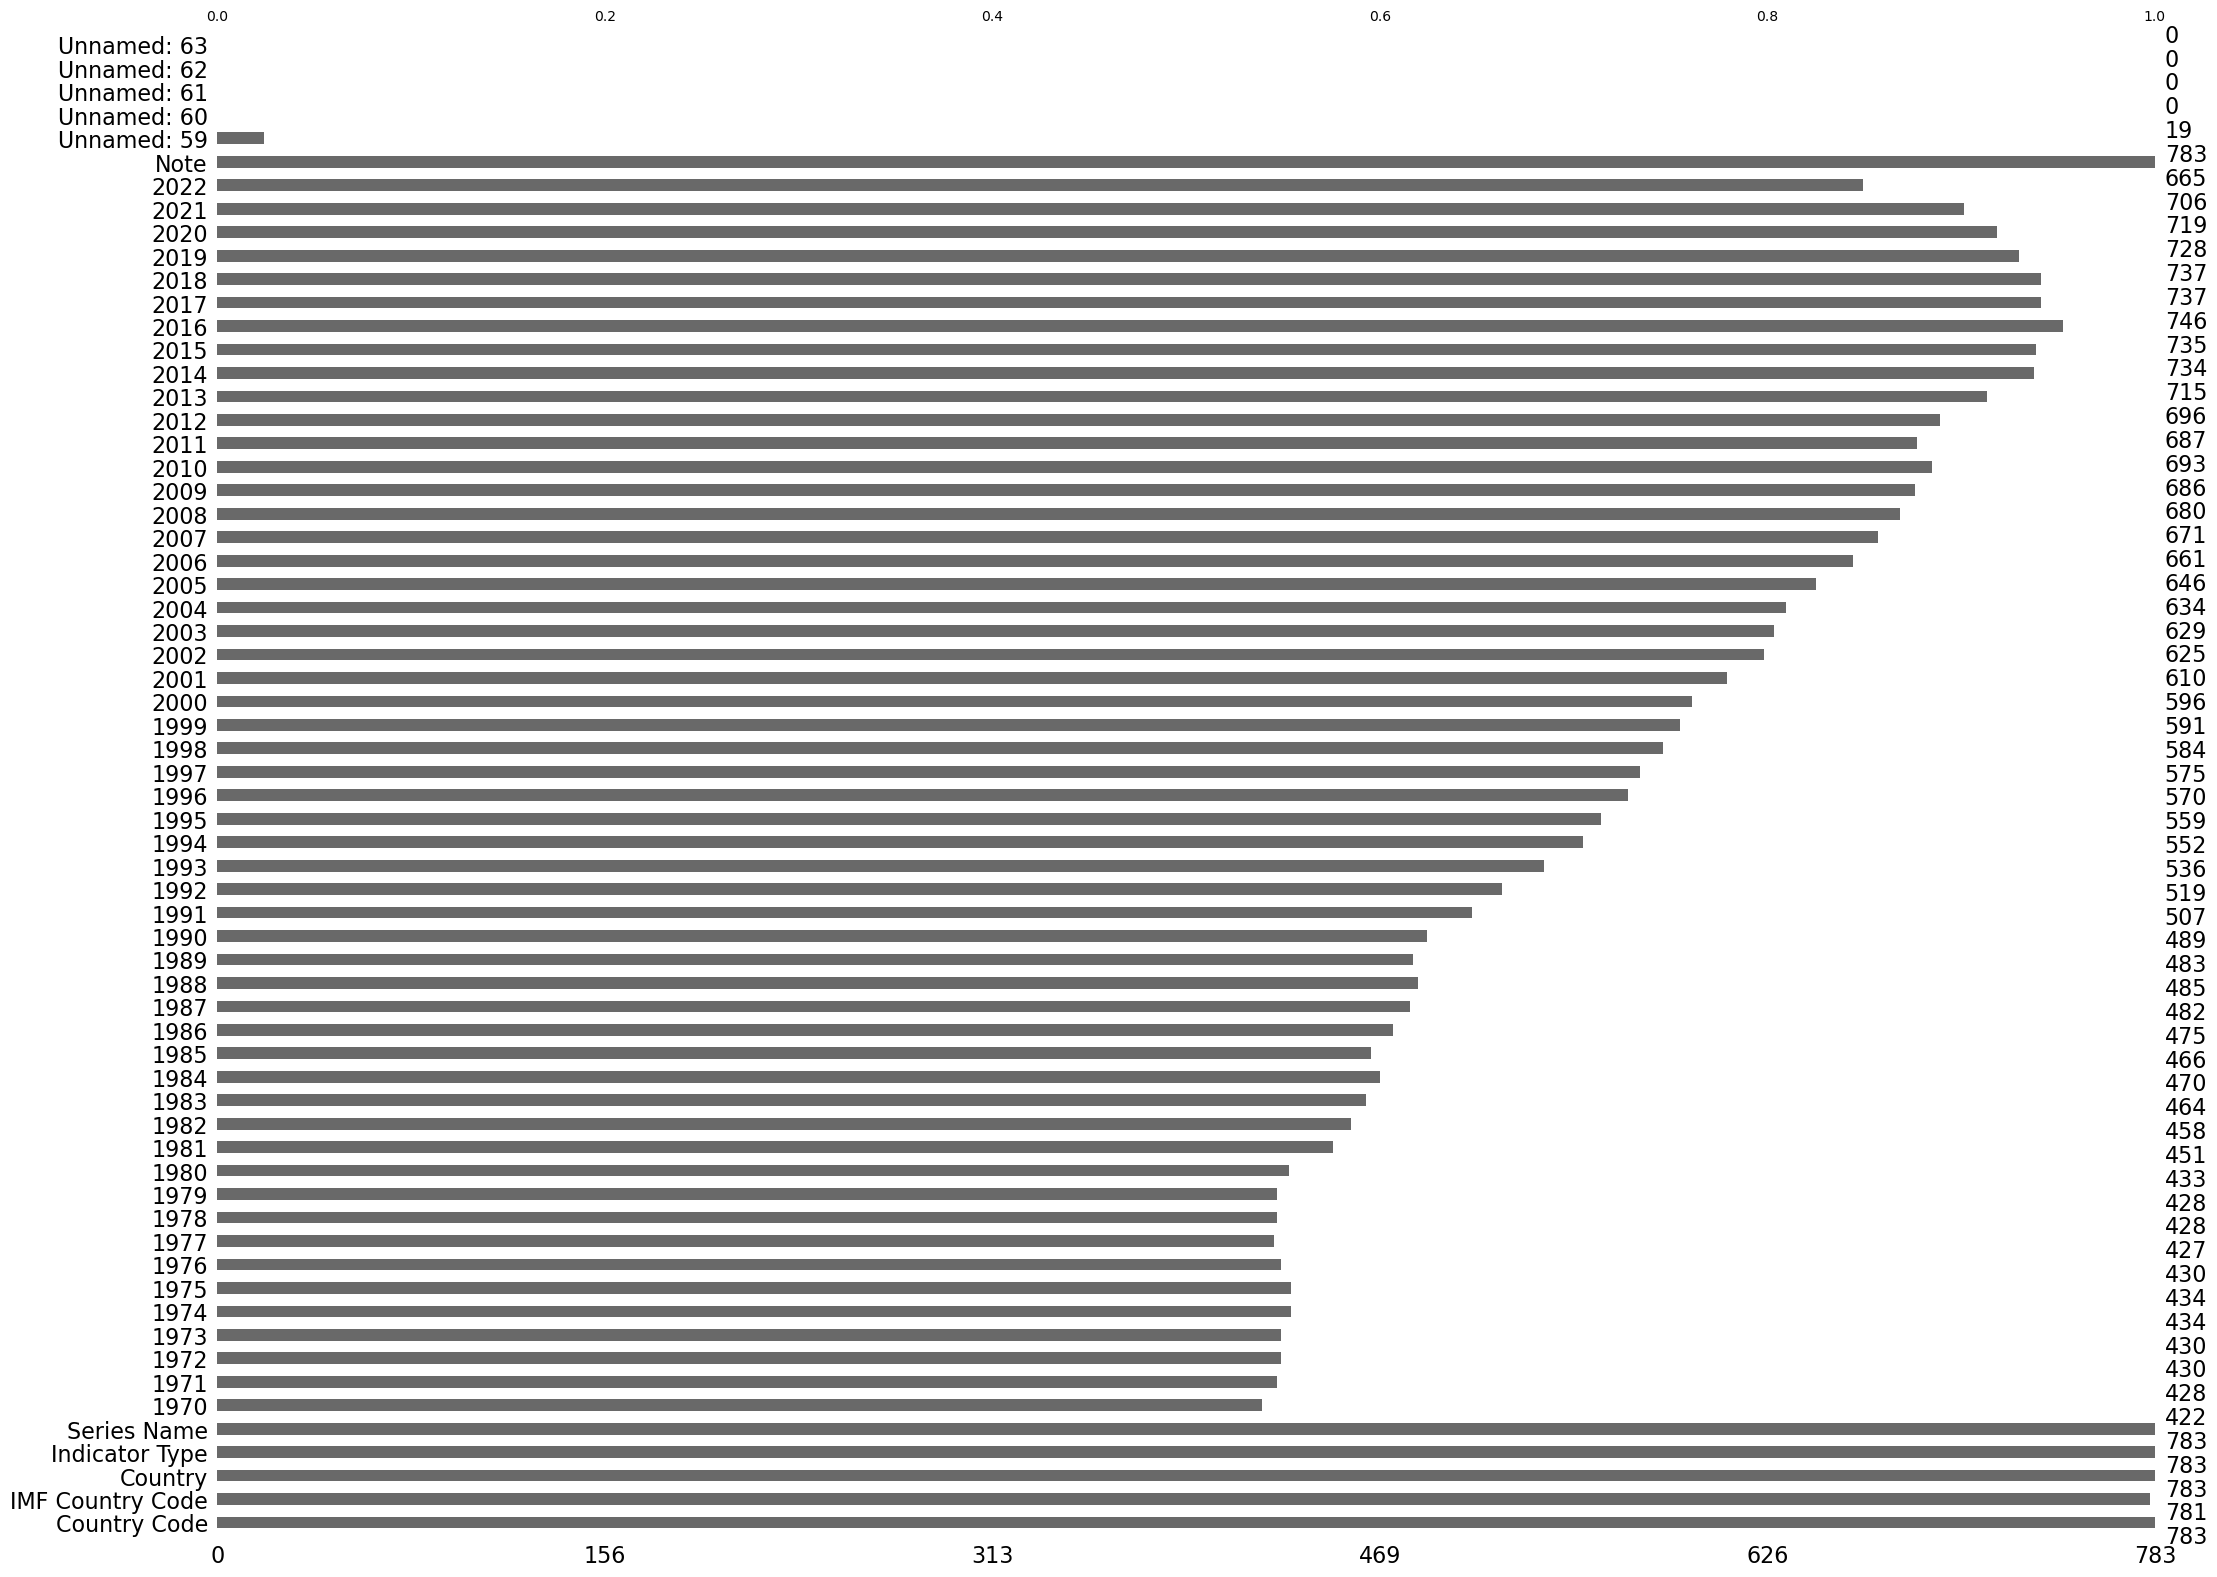

In [190]:
import missingno as msno
import matplotlib.pyplot as plt


msno.bar(df)
plt.show()

In [191]:
df.groupby('Country').apply(lambda x: x.isna().sum())


,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,3,3,3,3,3,...,1,2,3,4,0,3,4,4,4,4
Albania,0,0,0,0,0,5,5,5,5,5,...,0,0,0,0,0,5,5,5,5,5
Algeria,0,0,0,0,0,2,2,2,2,2,...,0,1,0,1,0,4,4,4,4,4
Angola,0,0,0,0,0,2,2,2,2,2,...,0,0,0,0,0,3,3,3,3,3
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,3,3,3,3,3,...,1,1,1,1,0,5,5,5,5,5
West Bank and Gaza,0,0,0,0,0,1,1,1,1,1,...,0,0,0,1,0,1,1,1,1,1
"Yemen, Rep.",0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,2,2,2,2,2


In [192]:
# Drop irrelevant columns
df=df.drop(columns=['Unnamed: 59','Unnamed: 60','Unnamed: 61','Unnamed: 62','Unnamed: 63','Note','IMF Country Code', 'Indicator Type', 'Country Code'])


## Divide the dataset by the inflation types 
Headline inflation refers to the change in value of all goods in the basket.
Core inflation excludes food and fuel items from headline inflation.

Since the prices of fuel and food items tend to fluctuate and create ‘noise’ in inflation computation, core inflation is less volatile than headline inflation.
In a developed economy, food & fuel account for 10-15% of the household consumption basket

Read more at: https://economictimes.indiatimes.com/wealth/save/what-are-headline-and-core-inflation/articleshow/80071229.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst


In [193]:
df['Series Name'].unique()

array(['Headline Consumer Price Inflation',
       'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
       'Official Core Consumer Price Inflation',
       'Producer Price Inflation'], dtype=object)

In [195]:
df_headline = df[df['Series Name'] == 'Headline Consumer Price Inflation']
df_energy = df[df['Series Name'] == 'Energy Consumer Price Inflation']
df_food = df[df['Series Name'] == 'Food Consumer Price Inflation']
df_core = df[df['Series Name'] == 'Official Core Consumer Price Inflation'] 
df_producer = df[df['Series Name'] == 'Producer Price Inflation']

## Core inflation rate will be used for the analysis 

In [227]:
df_core.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
557,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.80,2.70,0.20,5.20,5.40,-0.10,NaN,NaN,NaN,NaN
558,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.19,0.10,-0.16,0.15,0.82,0.93,0.74,1.41,1.68,6.12
559,Australia,5.028,-10.91,6.34,8.56,15.55,15.99,13.71,12.73,7.61,...,1.13,2.57,2.33,27.38,5.54,1.54,1.49,0.44,1.41,5.05
560,Austria,3.684,5.19,6.37,7.38,9.84,9.35,10.17,6.08,3.74,...,2.07,1.98,1.85,1.47,1.97,1.81,1.65,1.90,2.15,5.28
561,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.85,1.88,5.14,-2.02,0.70,3.70,1.17,1.30,7.23,8.28


### Transpose the dataframe 

In [218]:
# Drop the columns that are irrelevant to the analysis

value_vars = df.columns.tolist()[1:]


In [199]:
df_core=df_core.drop(columns=['Series Name'])


In [200]:
df_core_t = pd.melt(frame=df_core, id_vars='Country', var_name='years', value_name='core_inflation_rate')
df_core_t

,Country,years,core_inflation_rate
0,Afghanistan,1970,NaN
1,Albania,1970,NaN
2,Australia,1970,5.028
3,Austria,1970,3.684
4,Armenia,1970,NaN
...,...,...,...
5984,United States,2022,6.220
5985,"Venezuela, RB",2022,NaN
5986,Vietnam,2022,2.390
5987,Kosovo,2022,NaN


In [201]:
df_core_t.Country.unique() # array of all countries in the dataset

array(['Afghanistan', 'Albania', 'Australia', 'Austria', 'Armenia',
       'Azerbaijan', 'Belgium', 'Bulgaria', 'Belarus', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'China', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti',
       'Denmark', 'Dominican Republic', 'Egypt, Arab Rep.', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'France', 'United Kingdom',
       'Ghana', 'Greece', 'Guatemala', 'Hong Kong SAR, China', 'Honduras',
       'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland',
       'Iran, Islamic Rep.', 'Iraq', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Kyrgyz Republic', 'Korea, Rep.',
       'Kuwait', 'Lao, PDR', 'Lebanon', 'Libya', 'Sri Lanka', 'Lithuania',
       'Luxembourg', 'Latvia', 'Macao SAR, China', 'Morocco', 'Mexico',
       'North Macedonia', 'Malta', 'Montenegro', 'Mauritius', 'Malaysia',
       'Nigeria', 'Nicaragua', 'Netherlands', 'Norway', 'New Zealand',
       'Oman'

#### Create a sub dataframe for European Union Countries

In [202]:
# Define a list of EU countries
eu_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
                'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
                'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
                'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
                'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
                'Spain', 'Sweden']

# Filter the data to include only the EU countries and years 
eu_core_t = df_core_t[(df_core_t['Country'].isin(eu_countries)) & (df_core_t['years'].astype(int) >= 2000)]



In [203]:
df_core_t['years'].unique()

array(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'], dtype=object)

In [204]:

fig = px.line(eu_core_t, x="years", y="core_inflation_rate", color="Country",title= 'EU Inflation Rates Comparison')
fig.show()

## EU Inflation Rates 2000-2022 ( Animated 👉🏼 ▶️ )

In [205]:
import plotly.express as px

fig = px.choropleth(eu_core_t, locations="Country",
                    locationmode='country names',
                    color="core_inflation_rate",
                    hover_name="Country",
                    animation_frame="years",
                    title = "EU Inflation Rates 2000-2022",
                    color_continuous_scale="matter",
                    range_color=[-15, 30],
                    projection = 'equirectangular', scope= 'europe')

# Update the layout
fig.update_layout(margin={'r':0,'t':50,'l':0,'b':0})

# Show the figure
fig.show()



### Replacing missing data with mean values

In [206]:

# group the NaN values by Country
nan_groups = eu_core_t[eu_core_t['core_inflation_rate'].isna()].groupby('Country')

# count the number of NaN values in each group
nan_counts = nan_groups.size()

print(nan_counts)

Country
Bulgaria    1
Cyprus      1
Malta       1
Romania     8
dtype: int64


In [207]:
# Define a list of EU countries
euro_zone = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
                'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
                'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
                'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
                'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
                'Spain', 'Sweden']

# Define a list of EU countries but not in the Eurozone
non_euro_zone= ['Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Hungary', 'Poland', 'Romania', 'Sweden']

# Define a list of Nordic countries
nordic_noneuro= ['Denmark', 'Finland', 'Norway', 'Sweden', 'Iceland']

In [208]:

# Filter the data to include only the EU countries and years 
eu_core_t = df_core_t[(df_core_t['Country'].isin(eu_countries)) & (df_core_t['years'].astype(int) >= 2000)]


# Filter the data to include EU countries but not in the Eurozone
non_euro_zone_t = df_core_t[(df_core_t['Country'].isin(non_euro_zone)) & (df_core_t['years'].astype(int) >= 2000)]


# Filter the data to include Nordic countries
nordic_t = df_core_t[(df_core_t['Country'].isin(nordic_noneuro)) & (df_core_t['years'].astype(int) >= 2000)]

In [209]:
# Check the nan values for non_euro_zone and nordic countries
nan_groups_noneuro = non_euro_zone_t[non_euro_zone_t['core_inflation_rate'].isna()].groupby('Country')
nan_groups_nordic = nordic_t[nordic_t['core_inflation_rate'].isna()].groupby('Country')

nan_counts_noneuro = nan_groups_noneuro.size()
nan_counts_nordic = nan_groups_nordic.size()

print(nan_counts_noneuro)
print(nan_counts_nordic )

Country
Bulgaria    1
Romania     8
dtype: int64
Series([], dtype: int64)


In [212]:
mean_rates = eu_core_t.groupby('Country')['core_inflation_rate'].mean()

eu_core_t.loc[:, 'core_inflation_rate'] = eu_core_t.groupby(
    'Country')['core_inflation_rate'].apply(
    lambda x: x.fillna(x.mean())
)

eu_core_t.head()

/var/folders/lv/vs66hkx54hx22vp47_cc75wh0000gn/T/ipykernel_97330/964198516.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,years,core_inflation_rate
3393,Austria,2000,1.66
3396,Belgium,2000,1.83
3397,Bulgaria,2000,1.13
3407,Cyprus,2000,2.83
3408,Czech Republic,2000,1.94


In [213]:
## Replace the nan values with the mean value 
mean_rates_ = non_euro_zone_t.groupby('Country')['core_inflation_rate'].mean()

non_euro_zone_t['core_inflation_rate'] = non_euro_zone_t.groupby(
    'Country')['core_inflation_rate'].apply(
    lambda x: x.fillna(x.mean()
                      )
)


/var/folders/lv/vs66hkx54hx22vp47_cc75wh0000gn/T/ipykernel_97330/110949905.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Plot Non-Eurozone EU Countries Inflation Rates Comparison 2000-2022

In [215]:
fig = px.line(non_euro_zone_t, x="years", y="core_inflation_rate", 
              color="Country",
              line_shape="spline", 
              render_mode="svg", 
              title= 'Non-Eurozone EU Countries Inflation Rates Comparison 2000-2022')
fig.show()

### Plot Nordic Countries Inflation Rates Comparison 2000-2022

In [217]:
fig = px.line(nordic_t, x="years", y="core_inflation_rate", color="Country",title= 'Nordic Countries Inflation Rates Comparison 2000-2022')
fig.show()

### Part 2

In [79]:
nordic= nordic_t.pivot(index='years', columns='Country', values='core_inflation_rate')

In [82]:
from scipy.stats import f_oneway
fvalue, pvalue = f_oneway(nordic['Denmark'],nordic['Sweden'])

In [84]:
print("F-value:", fvalue)
print("P-value:", pvalue)

F-value: 0.31374480014792805
P-value: 0.5782321359347373
